# Introduction to Machine Learning and Data Science: Exploratory Data Analysis (EDA) with Diabetes Dataset

This notebook contains exercises for an introductory course on Machine Learning and Data Science, focusing on Exploratory Data Analysis (EDA) using the Pima Indians Diabetes dataset.

We will cover essential steps in understanding, cleaning, transforming, and analyzing the data using pandas and matplotlib/seaborn. The exercises are divided into basic, intermediate, and advanced levels.

**Estimated Time:** 2 Hours

## Setup

First, we need to import the necessary libraries and load the dataset. The dataset does not come with headers, so we will define the column names based on common practice for this dataset:

1. Pregnancies
2. Glucose
3. BloodPressure
4. SkinThickness
5. Insulin
6. BMI
7. DiabetesPedigreeFunction
8. Age
9. Outcome (0 for no diabetes, 1 for diabetes)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# URL for the Pima Indians Diabetes dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Load the dataset
diabetes_df = pd.read_csv(url, names=names)

# Display the first few rows to confirm loading
print(diabetes_df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


## Basic Exercises (Approx. 45-60 minutes)

These exercises focus on fundamental data exploration and manipulation using pandas and basic visualization.

### Exercise 1: Initial Data Inspection

1. Display the last 7 rows of the `diabetes_df` DataFrame.
2. Get a concise summary of the DataFrame using `.info()`. How many entries are there? What are the data types?
3. Generate a statistical summary of the numerical attributes using `.describe()`. Pay attention to the minimum values for columns like `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI`. Do you notice anything unusual?
4. Examine the unique values and their counts for the `Outcome` column using `.value_counts()`. Is the dataset balanced in terms of the outcome variable?

In [4]:
# Your code for Exercise 1.1
seven_rows_tail= diabetes_df.tail(7)
seven_rows_tail

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
# Your code for Exercise 1.2
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Your code for Exercise 1.3
diabetes_df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The most concerning issue is that several health measurements have minimum values of 0, which is physiologically impossible or highly improbable for living patients. These zero values almost certainly represent missing data that was encoded as zeros rather than proper null/NA values.

In [8]:
# Your code for Exercise 1.4
outcome_counts = diabetes_df['Outcome'].value_counts()
outcome_counts

Outcome
0    500
1    268
Name: count, dtype: int64

This represents an imbalance ratio of approximately 1.87:1 (nearly 2:1) between the negative and positive classes.
A dataset is typically considered balanced when the classes are roughly equal in size. With this 65/35 split, the diabetes dataset is moderately imbalanced, which is common in medical datasets where the disease state is often less prevalent than the healthy state.
This imbalance is significant enough that you should consider:

1. Using evaluation metrics beyond accuracy (like precision, recall, F1-score, or ROC-AUC)
2. Applying techniques to address the imbalance during modeling (such as class weights, SMOTE, or undersampling)
Being cautious about model interpretations, as the model might be biased toward predicting the majority class

For medical applications like diabetes prediction, it's particularly important to address this imbalance since false negatives (missing diabetes cases) could have serious health implications.

### Exercise 2: Basic Data Filtering and Selection

1. Select and display only the `Age` and `BMI` columns for the first 10 patients.
2. Filter the DataFrame to show only the patients who tested positive for diabetes (`Outcome` is 1).
3. Calculate the average `Glucose` level for patients who tested negative for diabetes (`Outcome` is 0).

In [11]:
# Your code for Exercise 2.1
age_bmi_columns=diabetes_df[['Age','BMI']]
age_bmi_columns.head(10)

,Age,BMI
0,50,33.6
1,31,26.6
2,32,23.3
3,21,28.1
4,33,43.1
5,30,25.6
6,26,31.0
7,29,35.3
8,53,30.5
9,54,0.0


In [12]:
# Your code for Exercise 2.2
positive_diabetes = diabetes_df[diabetes_df['Outcome']==1]
positive_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [16]:
# Your code for Exercise 2.3
negative_diabetes = diabetes_df[diabetes_df['Outcome']==0]
mean=negative_diabetes['Glucose'].mean()
print("Average of Glucose in negative diabetes patients", mean)

Average of Glucose in negative diabetes patients 109.98


### Exercise 3: Simple Visualization

1. Create a histogram for the `Age` column to visualize the age distribution of patients.
2. Generate a histogram for the `BMI` column.
3. Use seaborn's `countplot` to visualize the distribution of the `Outcome` variable (number of diabetic vs non-diabetic patients).

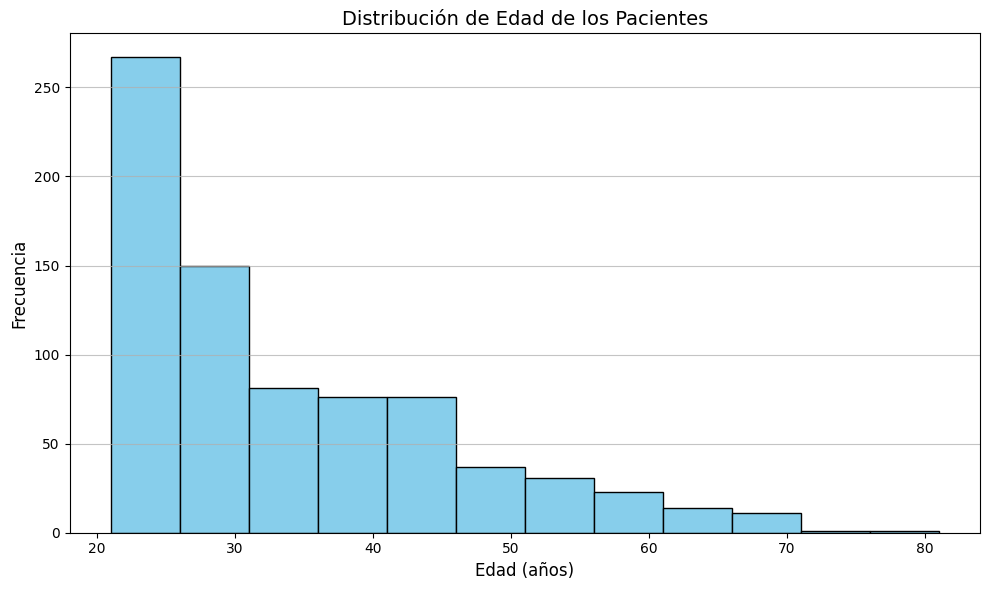

In [17]:
# Your code for Exercise 3.1
plt.figure(figsize=(10, 6))
plt.hist(diabetes_df['Age'], bins=12, color='skyblue', edgecolor='black')
plt.title('Distribución de Edad de los Pacientes', fontsize=14)
plt.xlabel('Edad (años)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

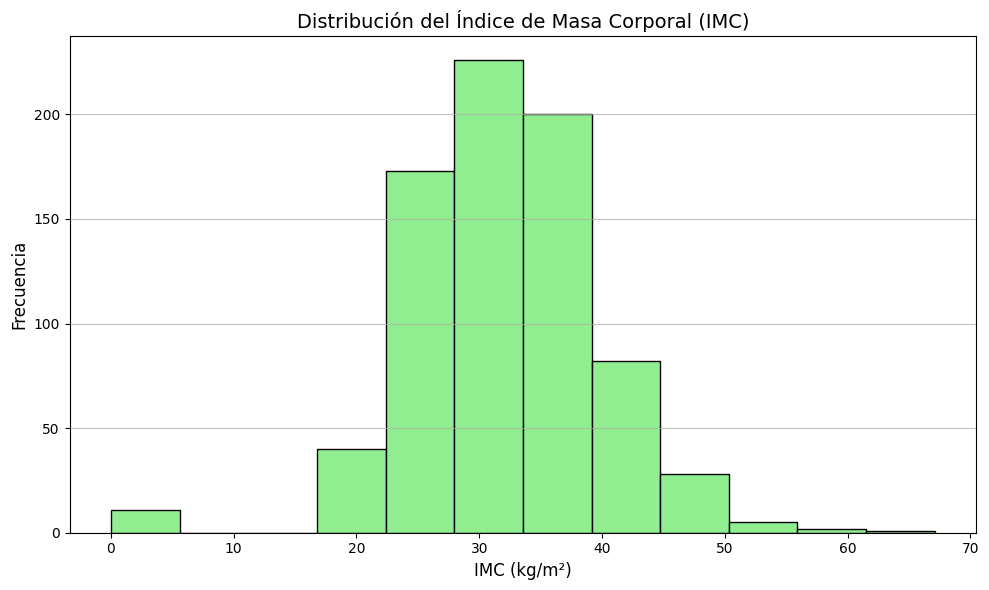

In [18]:
# Your code for Exercise 3.2
plt.figure(figsize=(10, 6))
plt.hist(diabetes_df['BMI'], bins=12, color='lightgreen', edgecolor='black')
plt.title('Distribución del Índice de Masa Corporal (IMC)', fontsize=14)
plt.xlabel('IMC (kg/m²)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

C:\Users\Alba Quiñones\AppData\Local\Temp\ipykernel_32408\2391820863.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Outcome', data=diabetes_df, palette=['lightcoral', 'mediumseagreen'])


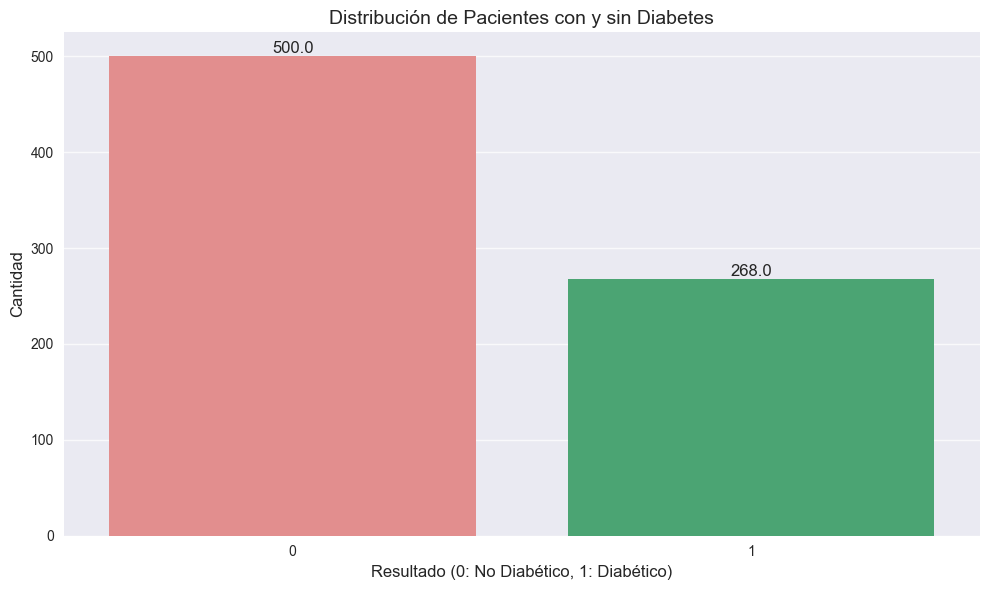

In [39]:
# Your code for Exercise 3.3
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Outcome', data=diabetes_df, palette=['lightcoral', 'mediumseagreen'])
plt.title('Distribución de Pacientes con y sin Diabetes', fontsize=14)
plt.xlabel('Resultado (0: No Diabético, 1: Diabético)', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

## Intermediate Exercises (Approx. 45-60 minutes)

These exercises delve into data cleaning, manipulation, and basic feature engineering.

### Exercise 4: Handling Missing Data (Implicit Missing Values)

As observed in Exercise 1.3, some columns have a minimum value of 0, which might represent missing data (e.g., a blood pressure of 0 is biologically impossible).

1. For the `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI` columns, replace the 0 values with `NaN` (Not a Number) to explicitly mark them as missing.
2. Verify the number of missing values in these columns after the replacement using `.info()` or `.isnull().sum()`. Which column has the most missing values now?
3. Choose an imputation strategy for the missing numerical values (e.g., replace with the mean or median of the respective column). Justify your choice.
4. Apply the chosen imputation strategy to fill the `NaN` values in the affected columns. Verify that there are no more missing values in these columns.

In [20]:
# Your code for Exercise 4.1
diabetes_clean = diabetes_df.copy()


zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


for column in zero_columns:
    diabetes_clean[column] = diabetes_clean[column].replace(0, np.nan)

diabetes_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [21]:
# Your code for Exercise 4.2

missing_values = diabetes_clean.isnull().sum()


missing_percentage = (diabetes_clean.isnull().sum() / len(diabetes_clean)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

print("Número y porcentaje de valores faltantes por columna:")
print(missing_data)


most_missing = missing_values.idxmax()
print(f"\nLa columna con más valores faltantes es '{most_missing}' con {missing_values[most_missing]} valores faltantes ({missing_percentage[most_missing]:.2f}%).")

Número y porcentaje de valores faltantes por columna:
                          Missing Values  Percentage (%)
Pregnancies                            0        0.000000
Glucose                                5        0.651042
BloodPressure                         35        4.557292
SkinThickness                        227       29.557292
Insulin                              374       48.697917
BMI                                   11        1.432292
DiabetesPedigreeFunction               0        0.000000
Age                                    0        0.000000
Outcome                                0        0.000000

La columna con más valores faltantes es 'Insulin' con 374 valores faltantes (48.70%).


Estadísticas descriptivas para las columnas con valores faltantes:
          Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  763.000000     733.000000     541.000000  394.000000  757.000000
mean   121.686763      72.405184      29.153420  155.548223   32.457464
std     30.535641      12.382158      10.476982  118.775855    6.924988
min     44.000000      24.000000       7.000000   14.000000   18.200000
25%     99.000000      64.000000      22.000000   76.250000   27.500000
50%    117.000000      72.000000      29.000000  125.000000   32.300000
75%    141.000000      80.000000      36.000000  190.000000   36.600000
max    199.000000     122.000000      99.000000  846.000000   67.100000


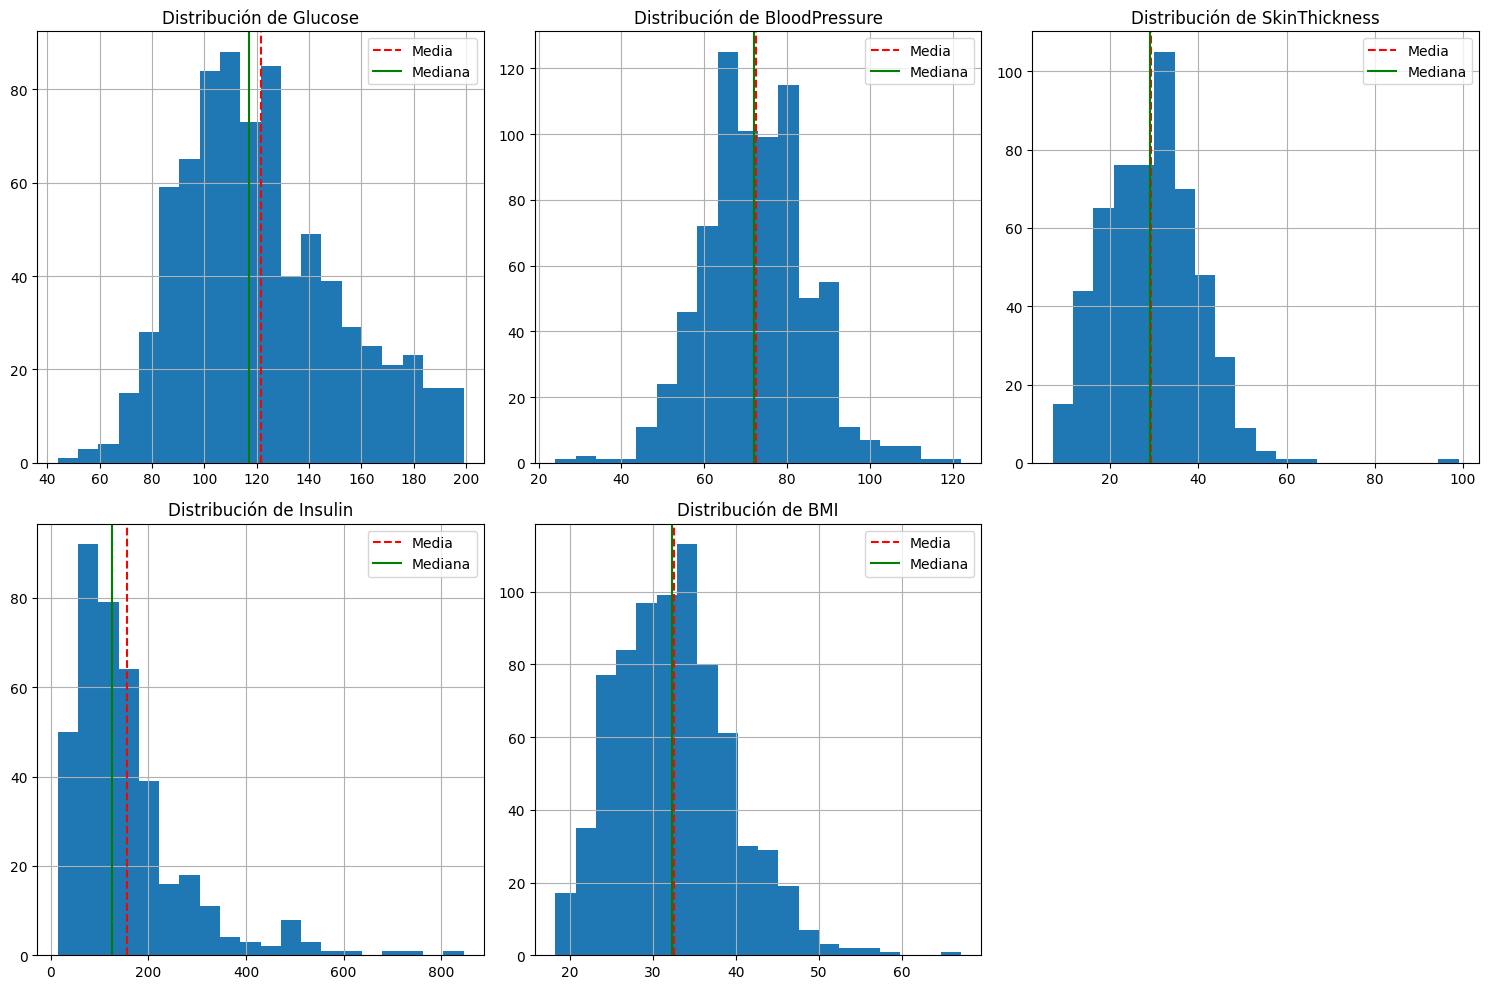


Justificación de la estrategia de imputación:

Después de analizar las distribuciones de los datos, elijo utilizar la MEDIANA para la imputación por las siguientes razones:

1. Resistencia a valores atípicos: La mediana es menos sensible a valores extremos que la media,
   y observamos que algunas columnas como 'Insulin' tienen distribuciones sesgadas con valores atípicos altos.

2. Preservación de la distribución: Para variables biomédicas como estas, la mediana suele representar 
   mejor el "valor típico" cuando hay asimetría.

3. Contexto clínico: En datos médicos, los valores extremos suelen ser casos clínicamente significativos 
   y no errores, por lo que no queremos que influyan excesivamente en nuestros valores imputados.

4. Porcentaje de datos faltantes: Algunas columnas como 'Insulin' tienen un alto porcentaje de valores 
   faltantes, lo que hace que la mediana sea una opción más robusta.



In [22]:
# Your code for Exercise 4.3 (Add comments for justification)
stats = diabetes_clean[zero_columns].describe()
print("Estadísticas descriptivas para las columnas con valores faltantes:")
print(stats)

plt.figure(figsize=(15, 10))
for i, column in enumerate(zero_columns):
    plt.subplot(2, 3, i+1)
    # Solo usamos valores no nulos para el histograma
    diabetes_clean[column].dropna().hist(bins=20)
    plt.axvline(diabetes_clean[column].mean(), color='red', linestyle='--', label='Media')
    plt.axvline(diabetes_clean[column].median(), color='green', linestyle='-', label='Mediana')
    plt.title(f'Distribución de {column}')
    plt.legend()

plt.tight_layout()
plt.show()

print("\nJustificación de la estrategia de imputación:")
print("""
Después de analizar las distribuciones de los datos, elijo utilizar la MEDIANA para la imputación por las siguientes razones:

1. Resistencia a valores atípicos: La mediana es menos sensible a valores extremos que la media,
   y observamos que algunas columnas como 'Insulin' tienen distribuciones sesgadas con valores atípicos altos.

2. Preservación de la distribución: Para variables biomédicas como estas, la mediana suele representar 
   mejor el "valor típico" cuando hay asimetría.

3. Contexto clínico: En datos médicos, los valores extremos suelen ser casos clínicamente significativos 
   y no errores, por lo que no queremos que influyan excesivamente en nuestros valores imputados.

4. Porcentaje de datos faltantes: Algunas columnas como 'Insulin' tienen un alto porcentaje de valores 
   faltantes, lo que hace que la mediana sea una opción más robusta.
""")

In [24]:
# Your code for Exercise 4.4
for column in zero_columns:

    median_value = diabetes_clean[column].median()
    diabetes_clean[column].fillna(median_value, inplace=True)
    
    print(f"Columna '{column}': valores faltantes reemplazados con la mediana ({median_value:.2f})")


missing_after = diabetes_clean.isnull().sum()
print("\nValores faltantes después de la imputación:")
print(missing_after)


print("\nEstadísticas después de la imputación:")
print(diabetes_clean[zero_columns].describe())

zeros_after = {}
for column in zero_columns:
    zeros_after[column] = (diabetes_clean[column] == 0).sum()

print("\nNúmero de valores 0 después de la imputación:")
for column, count in zeros_after.items():
    print(f"{column}: {count}")


Columna 'Glucose': valores faltantes reemplazados con la mediana (117.00)
Columna 'BloodPressure': valores faltantes reemplazados con la mediana (72.00)
Columna 'SkinThickness': valores faltantes reemplazados con la mediana (29.00)
Columna 'Insulin': valores faltantes reemplazados con la mediana (125.00)
Columna 'BMI': valores faltantes reemplazados con la mediana (32.30)

Valores faltantes después de la imputación:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Estadísticas después de la imputación:
          Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  768.000000     768.000000     768.000000  768.000000  768.000000
mean   121.656250      72.386719      29.108073  140.671875   32.455208
std     30.438286      12.096642       8.

C:\Users\Alba Quiñones\AppData\Local\Temp\ipykernel_32408\2494338454.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_clean[column].fillna(median_value, inplace=True)
C:\Users\Alba Quiñones\AppData\Local\Temp\ipykernel_32408\2494338454.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

### Exercise 5: Creating New Features (Feature Engineering)

Create a new categorical feature based on the `Age` column.

1. Define age bins (e.g., '0-20', '21-30', '31-40', '41-50', '51+').
2. Create a new column called `AgeGroup` by categorizing the `Age` values into these bins.
3. Display the value counts for the new `AgeGroup` column.

Distribución de grupos de edad:
AgeGroup
0-20       0
21-30    396
31-40    165
41-50    118
51+       89
Name: count, dtype: int64


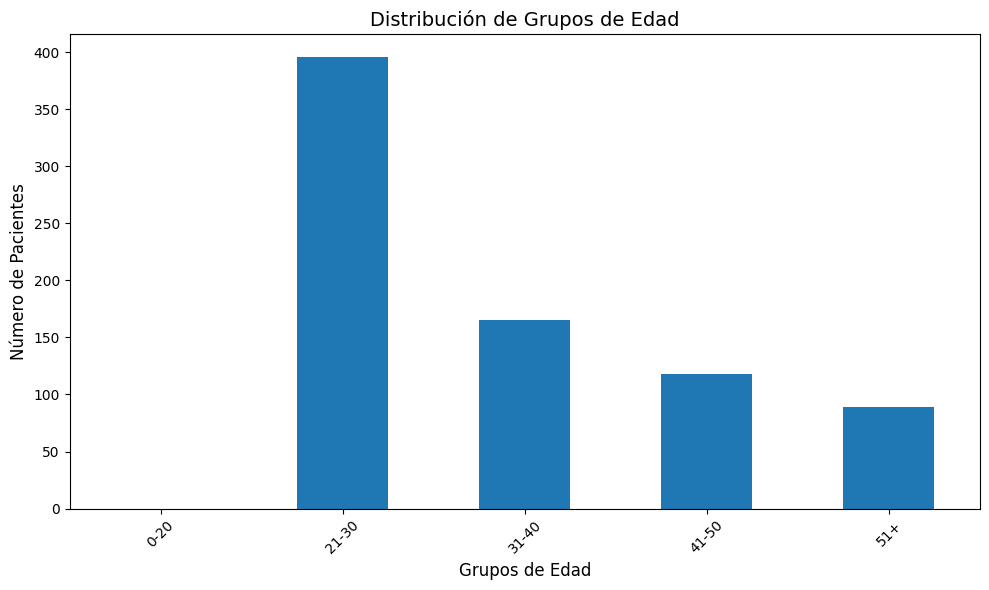

In [25]:
# Your code for Exercise 5.1, 5.2, and 5.3
age_bins = [0, 20, 30, 40, 50, float('inf')]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51+']

diabetes_clean['AgeGroup'] = pd.cut(diabetes_clean['Age'], 
                                     bins=age_bins, 
                                     labels=age_labels, 
                                     right=False)

# 3. Mostrar los conteos de valores para la nueva columna AgeGroup
age_group_counts = diabetes_clean['AgeGroup'].value_counts().sort_index()
print("Distribución de grupos de edad:")
print(age_group_counts)

# Visualización de la distribución de grupos de edad
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar')
plt.title('Distribución de Grupos de Edad', fontsize=14)
plt.xlabel('Grupos de Edad', fontsize=12)
plt.ylabel('Número de Pacientes', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

### Exercise 6: Exploring Correlations

1. Compute the correlation matrix for the numerical features in the DataFrame using `.corr()`.
2. Display the correlations of all numerical features with the `Outcome` variable, sorted in descending order. Which features have the strongest positive and negative correlations with diabetes outcome?
3. Use seaborn's `heatmap` to visualize the correlation matrix. Interpret the relationships between different features.

In [26]:
# Your code for Exercise 6.1
numerical_df = diabetes_clean.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numerical_df.corr()

# Mostrar la matriz de correlación
print("Matriz de correlación de las características numéricas:")
print(correlation_matrix)

Matriz de correlación de las características numéricas:
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128213       0.208615       0.081770   
Glucose                      0.128213  1.000000       0.218937       0.192615   
BloodPressure                0.208615  0.218937       1.000000       0.191892   
SkinThickness                0.081770  0.192615       0.191892       1.000000   
Insulin                      0.025047  0.419451       0.045363       0.155610   
BMI                          0.021559  0.231049       0.281257       0.543205   
DiabetesPedigreeFunction    -0.033523  0.137327      -0.002378       0.102188   
Age                          0.544341  0.266909       0.324915       0.126107   
Outcome                      0.221898  0.492782       0.165723       0.214873   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.025047  0.021559               

Correlaciones con la variable 'Outcome' (ordenadas de mayor a menor):
Glucose                     0.492782
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Name: Outcome, dtype: float64


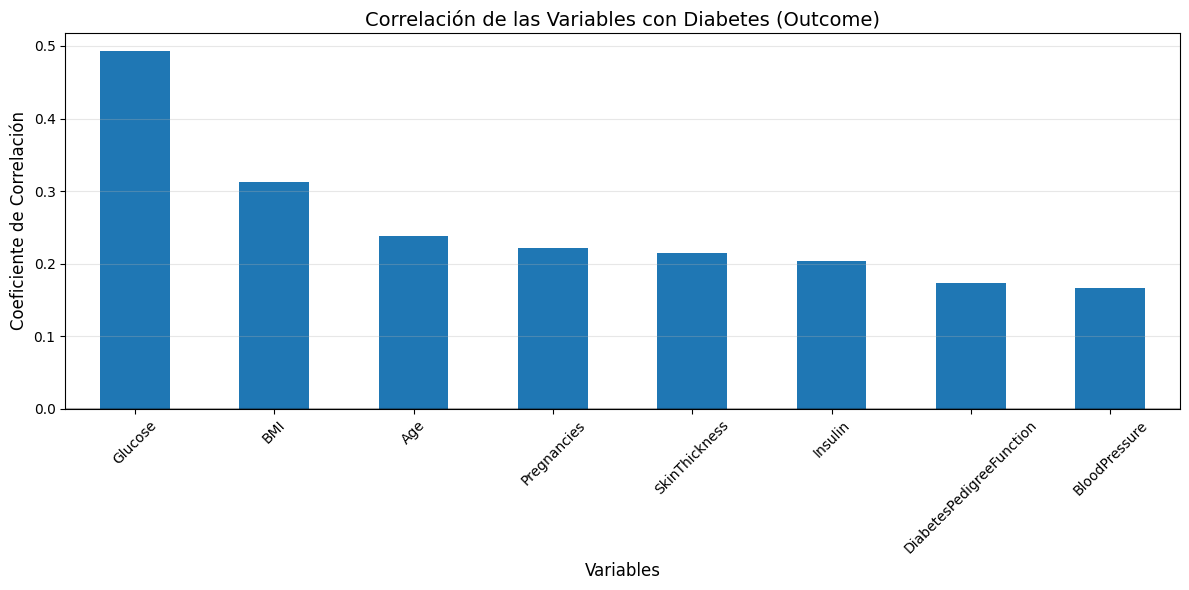


La variable con correlación positiva más fuerte con diabetes es 'Glucose' (0.493).
La variable con correlación negativa más fuerte con diabetes es 'BloodPressure' (0.166).


In [27]:
# Your code for Exercise 6.2

outcome_correlations = correlation_matrix['Outcome'].drop('Outcome')  # Excluir la autocorrelación
sorted_correlations = outcome_correlations.sort_values(ascending=False)

print("Correlaciones con la variable 'Outcome' (ordenadas de mayor a menor):")
print(sorted_correlations)

# Crear visualización de barras para las correlaciones
plt.figure(figsize=(12, 6))
sorted_correlations.plot(kind='bar')
plt.title('Correlación de las Variables con Diabetes (Outcome)', fontsize=14)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Coeficiente de Correlación', fontsize=12)
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Destacar las variables con correlación más fuerte
strongest_positive = sorted_correlations.idxmax()
strongest_negative = sorted_correlations.idxmin()
highest_correlation = sorted_correlations.max()
lowest_correlation = sorted_correlations.min()

print(f"\nLa variable con correlación positiva más fuerte con diabetes es '{strongest_positive}' ({highest_correlation:.3f}).")
print(f"La variable con correlación negativa más fuerte con diabetes es '{strongest_negative}' ({lowest_correlation:.3f}).")

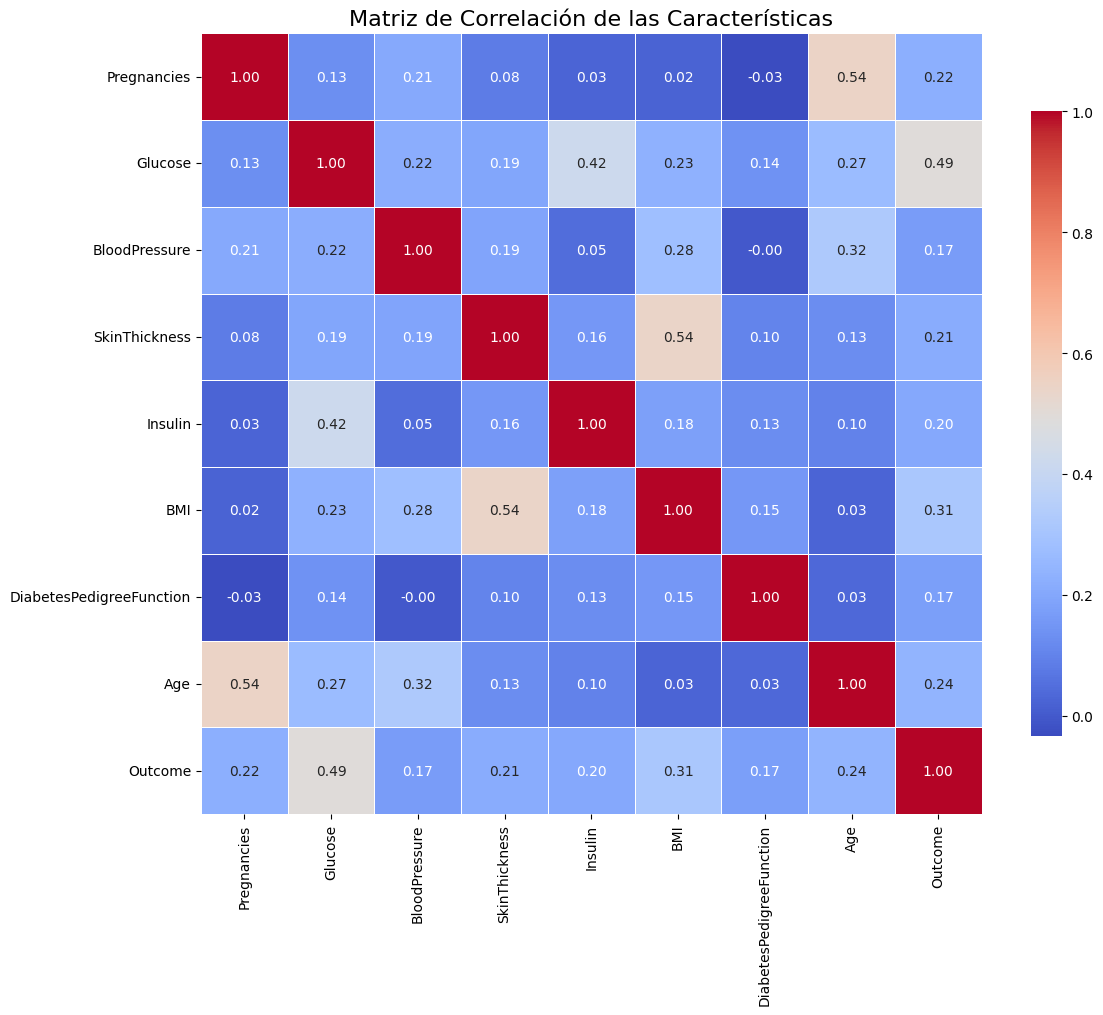


### Interpretación de las Relaciones entre Variables:

Correlaciones con Diabetes (Outcome)

Glucose (0.49): Muestra la correlación positiva más fuerte con la diabetes, lo que confirma que niveles elevados de glucosa son un indicador clave para el diagnóstico de diabetes.
BMI (0.31): La segunda correlación más alta, indicando que un mayor índice de masa corporal está asociado con mayor riesgo de diabetes.
Age (0.24): Correlación positiva moderada, reflejando el aumento del riesgo de diabetes tipo 2 con la edad.
Pregnancies (0.22) y SkinThickness (0.21): Correlaciones positivas moderadas, sugiriendo que tanto el número de embarazos como la adiposidad subcutánea están asociados con mayor riesgo.

Correlaciones entre Variables Predictoras

BMI y SkinThickness (0.54): La correlación más fuerte entre predictores, lo que es lógico ya que ambas son medidas relacionadas con la adiposidad corporal.
Age y Pregnancies (0.54): Correlación fuerte que refleja la relación natural entre edad y número

In [30]:
# Your code for Exercise 6.3
# 3. Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 10))


# Crear el mapa de calor con seaborn
sns.heatmap(correlation_matrix, 
            annot=True,  # Mostrar los valores de correlación
            fmt='.2f',   # Formato de 2 decimales
            cmap='coolwarm',  # Escala de color
            square=True, # Hacer celdas cuadradas
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})

plt.title('Matriz de Correlación de las Características', fontsize=16)
plt.tight_layout()
plt.show()

# Interpretación de las relaciones
print("""
### Interpretación de las Relaciones entre Variables:

Correlaciones con Diabetes (Outcome)

Glucose (0.49): Muestra la correlación positiva más fuerte con la diabetes, lo que confirma que niveles elevados de glucosa son un indicador clave para el diagnóstico de diabetes.
BMI (0.31): La segunda correlación más alta, indicando que un mayor índice de masa corporal está asociado con mayor riesgo de diabetes.
Age (0.24): Correlación positiva moderada, reflejando el aumento del riesgo de diabetes tipo 2 con la edad.
Pregnancies (0.22) y SkinThickness (0.21): Correlaciones positivas moderadas, sugiriendo que tanto el número de embarazos como la adiposidad subcutánea están asociados con mayor riesgo.

Correlaciones entre Variables Predictoras

BMI y SkinThickness (0.54): La correlación más fuerte entre predictores, lo que es lógico ya que ambas son medidas relacionadas con la adiposidad corporal.
Age y Pregnancies (0.54): Correlación fuerte que refleja la relación natural entre edad y número de embarazos.
Glucose e Insulin (0.42): Correlación moderada que representa la relación fisiológica entre niveles de glucosa y respuesta insulínica.
Age y BloodPressure (0.32): Muestra la tendencia conocida de aumento de la presión arterial con la edad.

Correlaciones Débiles

DiabetesPedigreeFunction: Muestra correlaciones generalmente débiles con otras variables (la mayoría < 0.17), excepto con Outcome (0.17), sugiriendo que la historia familiar de diabetes opera de manera relativamente independiente de otros factores de riesgo.
Insulin y Pregnancies (0.03): Correlación muy débil, indicando poca relación entre número de embarazos y niveles de insulina.
""")

## Advanced Exercises (Approx. 30-45 minutes, potentially carrying over into self-study)

These exercises challenge students with more complex data transformations and analysis.

### Exercise 7: Analyzing Relationships with Outcome

Use visualizations to explore the relationship between different features and the `Outcome` (diabetes positive or negative).

1. Create a violin plot using seaborn to visualize the distribution of `Age` for both `Outcome` groups (0 and 1).
2. Create a scatter plot of `Glucose` vs `BMI`, coloring the points based on the `Outcome` variable.
3. Use seaborn's `boxplot` to compare the distribution of `BloodPressure` across different `AgeGroup` categories (created in Exercise 5).

C:\Users\Alba Quiñones\AppData\Local\Temp\ipykernel_32408\2525739695.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y='Age', data=diabetes_clean,


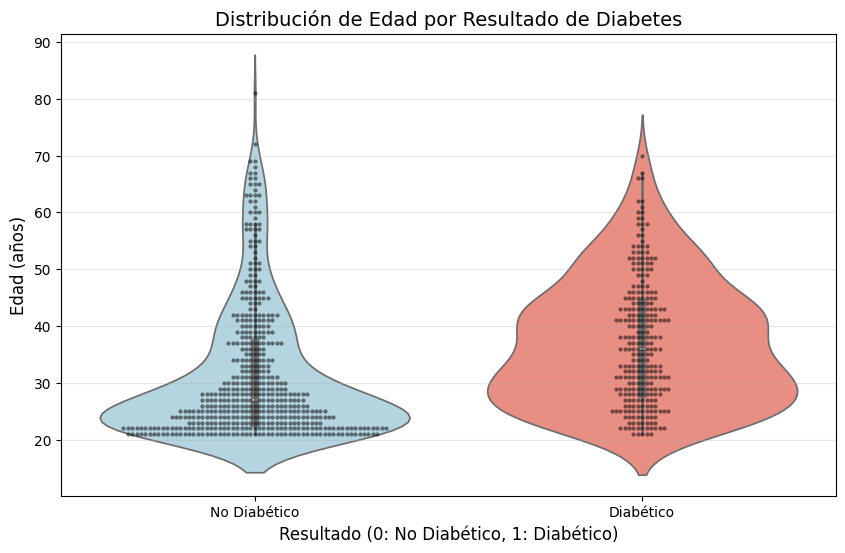

In [31]:
# Your code for Exercise 7.1
plt.figure(figsize=(10, 6))

# Crear violin plot para la edad según resultado de diabetes
sns.violinplot(x='Outcome', y='Age', data=diabetes_clean, 
              palette=['lightblue', 'salmon'])

# Añadir un swarmplot para mostrar los puntos individuales
sns.swarmplot(x='Outcome', y='Age', data=diabetes_clean, 
             color='black', alpha=0.5, size=3)

# Mejorar el formato del gráfico
plt.title('Distribución de Edad por Resultado de Diabetes', fontsize=14)
plt.xlabel('Resultado (0: No Diabético, 1: Diabético)', fontsize=12)
plt.ylabel('Edad (años)', fontsize=12)
plt.xticks([0, 1], ['No Diabético', 'Diabético'])
plt.grid(axis='y', alpha=0.3)


C:\Users\Alba Quiñones\AppData\Local\Temp\ipykernel_32408\347904896.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


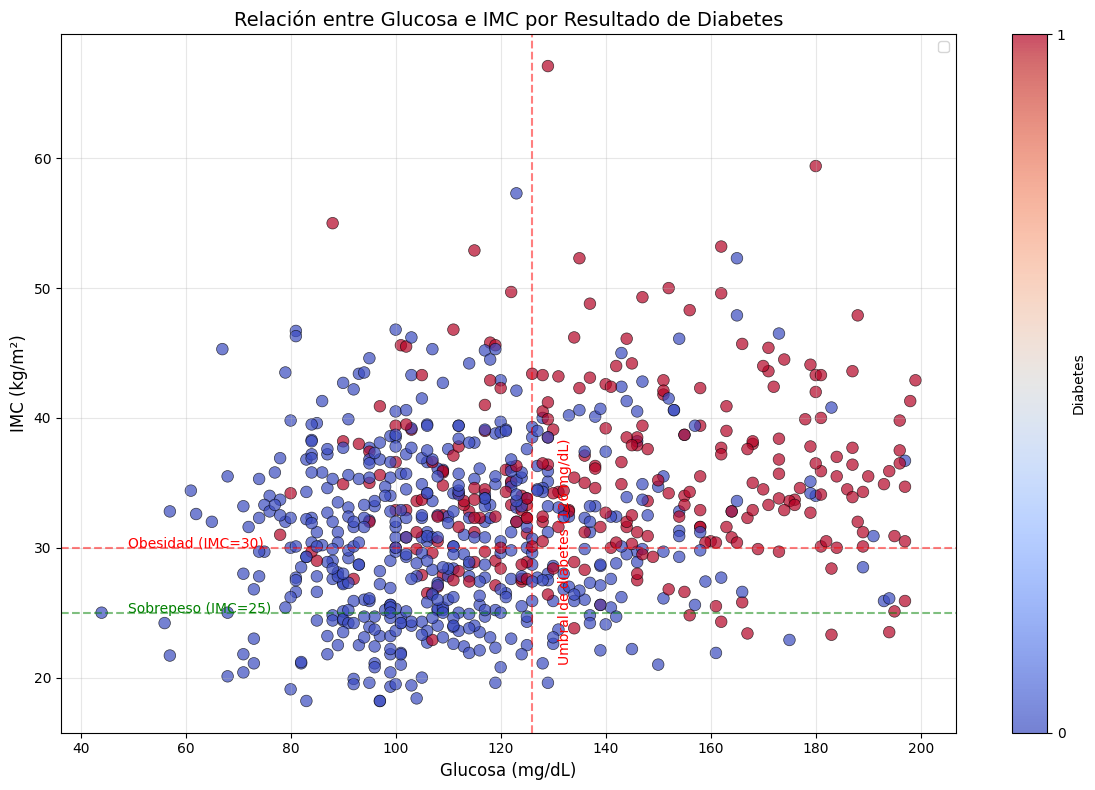

In [34]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(diabetes_clean['Glucose'], diabetes_clean['BMI'], 
                     c=diabetes_clean['Outcome'], cmap='coolwarm', 
                     alpha=0.7, s=70, edgecolors='k', linewidths=0.5)

plt.title('Relación entre Glucosa e IMC por Resultado de Diabetes', fontsize=14)
plt.xlabel('Glucosa (mg/dL)', fontsize=12)
plt.ylabel('IMC (kg/m²)', fontsize=12)
plt.grid(alpha=0.3)
plt.colorbar(scatter, ticks=[0, 1], label='Diabetes')

# Añadir líneas de referencia para valores normales/anormales
plt.axvline(x=126, color='red', linestyle='--', alpha=0.5)  # Umbral de glucosa para diabetes
plt.axhline(y=25, color='green', linestyle='--', alpha=0.5)  # Umbral de IMC para sobrepeso
plt.axhline(y=30, color='red', linestyle='--', alpha=0.5)  # Umbral de IMC para obesidad

# Añadir anotaciones para los umbrales
plt.annotate('Umbral de diabetes (126 mg/dL)', 
            xy=(126, diabetes_clean['BMI'].min() + 1), 
            xytext=(126+5, diabetes_clean['BMI'].min() + 3), 
            color='red', rotation=90)
plt.annotate('Sobrepeso (IMC=25)', 
            xy=(diabetes_clean['Glucose'].min() + 5, 25), 
            color='green')
plt.annotate('Obesidad (IMC=30)', 
            xy=(diabetes_clean['Glucose'].min() + 5, 30), 
            color='red')

plt.legend()
plt.tight_layout()
plt.show()

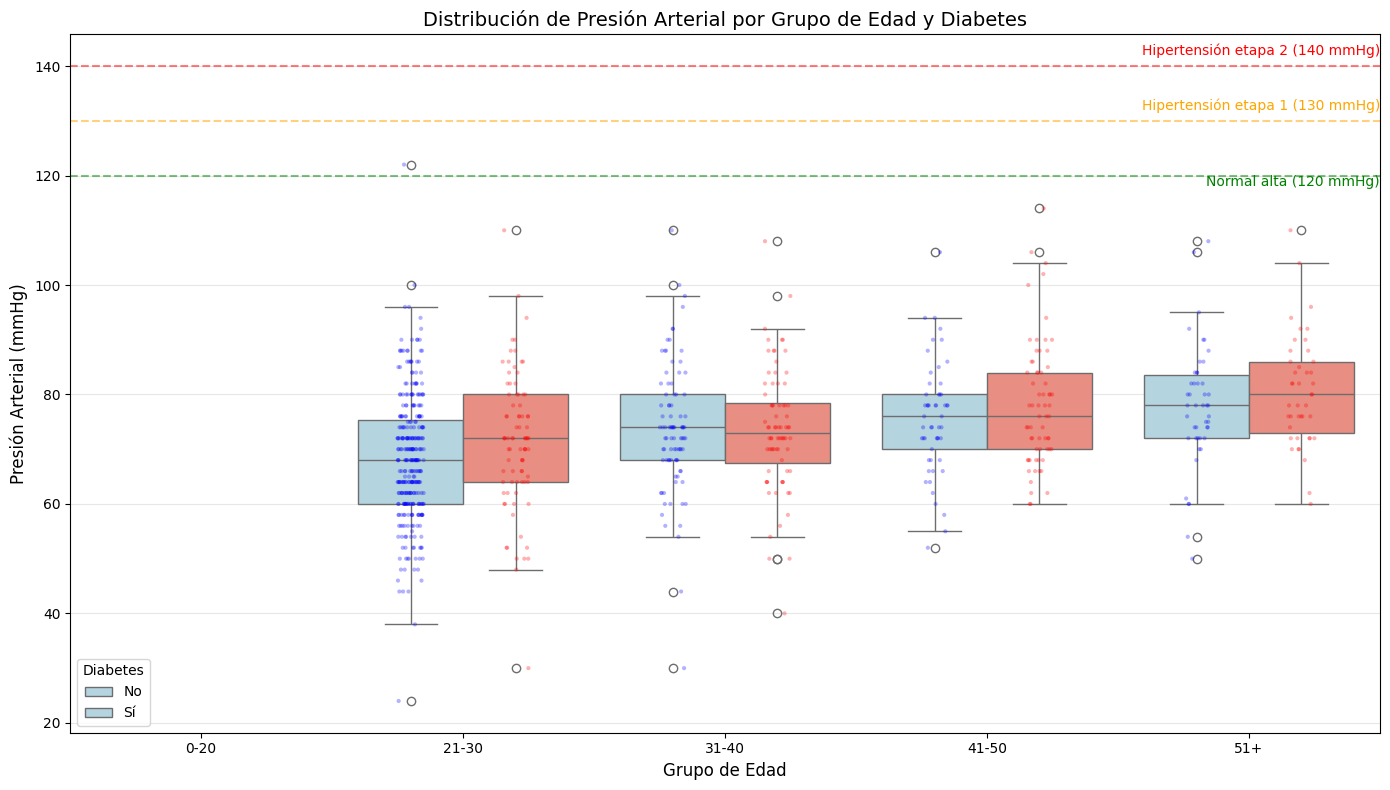

Estadísticas de Presión Arterial por Grupo de Edad y Resultado de Diabetes:
                       mean  median        std  count
AgeGroup Outcome                                     
0-20     0              NaN     NaN        NaN      0
         1              NaN     NaN        NaN      0
21-30    0        68.326923    68.0  11.543104    312
         1        71.428571    72.0  12.442916     84
31-40    0        73.617978    74.0  11.811498     89
         1        73.565789    73.0  11.141915     76
41-50    0        75.622642    76.0  10.275487     53
         1        78.107692    76.0  11.500167     65
51+      0        77.869565    78.0  11.222217     46
         1        80.581395    80.0  10.144744     43


C:\Users\Alba Quiñones\AppData\Local\Temp\ipykernel_32408\586151823.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_table = diabetes_clean.groupby(['AgeGroup', 'Outcome'])['BloodPressure'].agg(['mean', 'median', 'std', 'count'])


In [35]:
plt.figure(figsize=(14, 8))

# Crear boxplot de presión arterial por grupo de edad y resultado de diabetes
sns.boxplot(x='AgeGroup', y='BloodPressure', hue='Outcome', 
           data=diabetes_clean, palette=['lightblue', 'salmon'])


sns.stripplot(x='AgeGroup', y='BloodPressure', hue='Outcome', 
             data=diabetes_clean, palette=['blue', 'red'], 
             size=3, alpha=0.3, dodge=True)


plt.title('Distribución de Presión Arterial por Grupo de Edad y Diabetes', fontsize=14)
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Presión Arterial (mmHg)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Diabetes', labels=['No', 'Sí'])

# Añadir líneas de referencia para valores normales/anormales de presión arterial
plt.axhline(y=120, color='green', linestyle='--', alpha=0.5)  # Presión arterial normal alta
plt.axhline(y=130, color='orange', linestyle='--', alpha=0.5)  # Hipertensión etapa 1
plt.axhline(y=140, color='red', linestyle='--', alpha=0.5)  # Hipertensión etapa 2

# Añadir anotaciones para los umbrales
plt.annotate('Normal alta (120 mmHg)', 
            xy=(4.5, 120), 
            xytext=(4.5, 118), 
            color='green', ha='right')
plt.annotate('Hipertensión etapa 1 (130 mmHg)', 
            xy=(4.5, 130), 
            xytext=(4.5, 132), 
            color='orange', ha='right')
plt.annotate('Hipertensión etapa 2 (140 mmHg)', 
            xy=(4.5, 140), 
            xytext=(4.5, 142), 
            color='red', ha='right')

plt.tight_layout()
plt.show()

# Tabla de estadísticas
print("Estadísticas de Presión Arterial por Grupo de Edad y Resultado de Diabetes:")
stats_table = diabetes_clean.groupby(['AgeGroup', 'Outcome'])['BloodPressure'].agg(['mean', 'median', 'std', 'count'])
print(stats_table)

### Exercise 8: Outlier Identification (Visualization Based)

Use box plots to visually identify potential outliers in some of the key numerical features.

1. Create box plots for `Glucose`, `BloodPressure`, `Insulin`, and `BMI`.
2. Discuss what outliers might represent in this medical dataset and how they could potentially affect machine learning models.

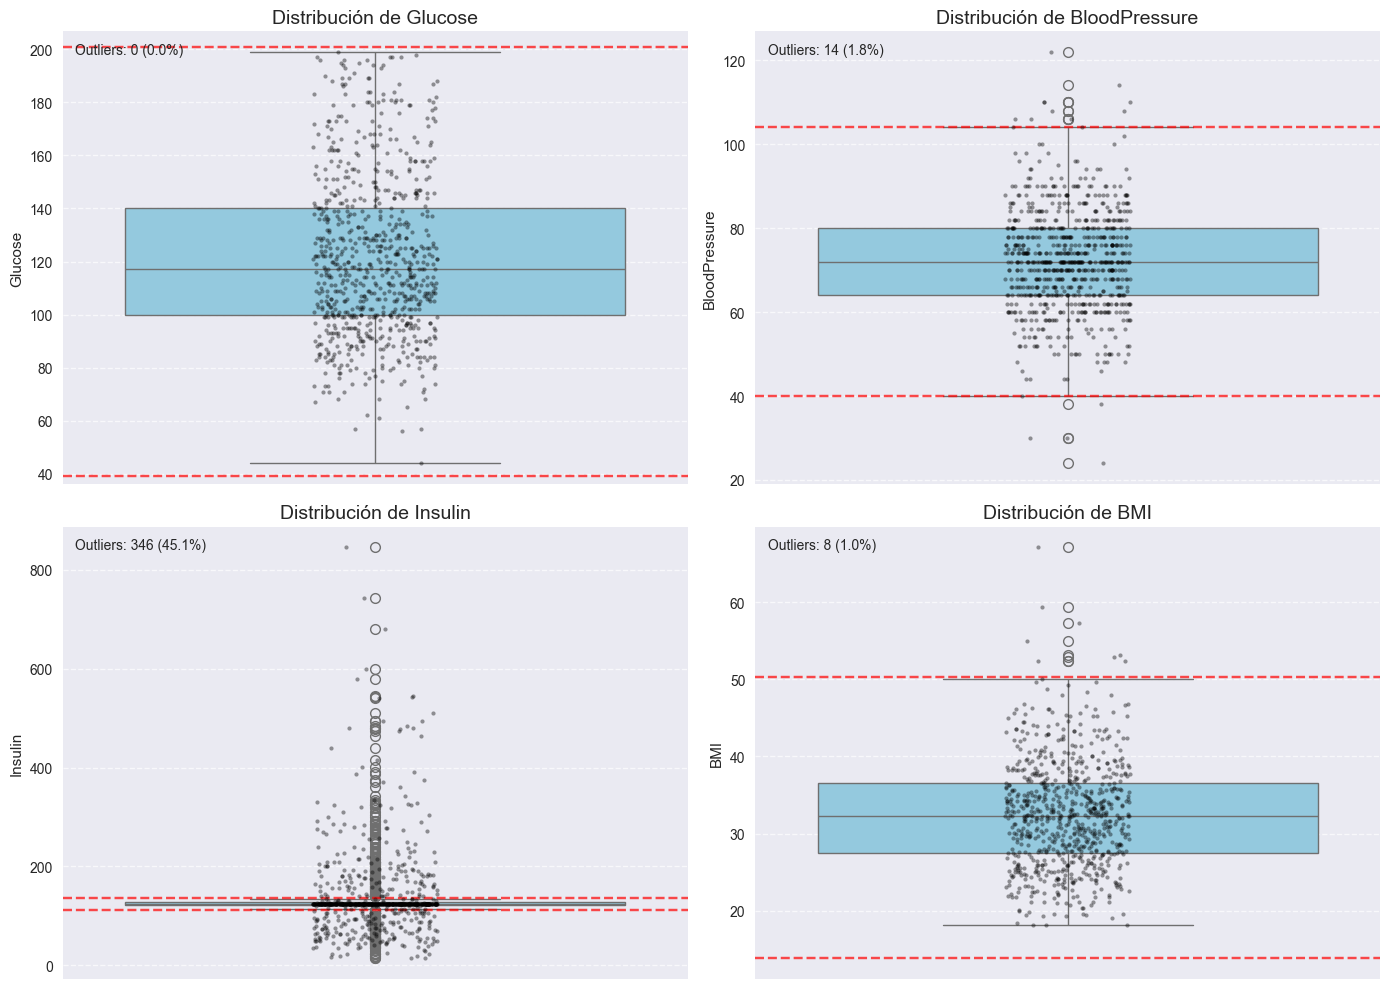

Análisis de la prevalencia de diabetes entre valores normales y atípicos:

Glucose:
  - Tasa de diabetes en valores normales: 34.9%
  - Tasa de diabetes en valores atípicos: nan%
  - Diferencia: nan puntos porcentuales

BloodPressure:
  - Tasa de diabetes en valores normales: 34.7%
  - Tasa de diabetes en valores atípicos: 42.9%
  - Diferencia: 8.1 puntos porcentuales

Insulin:
  - Tasa de diabetes en valores normales: 37.7%
  - Tasa de diabetes en valores atípicos: 31.5%
  - Diferencia: -6.2 puntos porcentuales

BMI:
  - Tasa de diabetes en valores normales: 34.5%
  - Tasa de diabetes en valores atípicos: 75.0%
  - Diferencia: 40.5 puntos porcentuales



In [36]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(14, 10))


key_features = ['Glucose', 'BloodPressure', 'Insulin', 'BMI']


for i, feature in enumerate(key_features):
    plt.subplot(2, 2, i+1)
    
    sns.boxplot(y=diabetes_clean[feature], color='skyblue')
    sns.stripplot(y=diabetes_clean[feature], color='black', alpha=0.4, size=3)
    
    plt.title(f'Distribución de {feature}', fontsize=14)
    plt.ylabel(feature)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Anotar estadísticas clave
    q1 = diabetes_clean[feature].quantile(0.25)
    median = diabetes_clean[feature].quantile(0.5)
    q3 = diabetes_clean[feature].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    
    plt.axhline(y=upper_bound, color='red', linestyle='--', alpha=0.7)
    plt.axhline(y=lower_bound, color='red', linestyle='--', alpha=0.7)
    
    # Contar outliers
    n_outliers = ((diabetes_clean[feature] > upper_bound) | 
                  (diabetes_clean[feature] < lower_bound)).sum()
    
    plt.annotate(f'Outliers: {n_outliers} ({n_outliers/len(diabetes_clean)*100:.1f}%)', 
                 xy=(0.02, 0.95), xycoords='axes fraction', fontsize=10)

plt.tight_layout()
plt.show()

# Comparar la prevalencia de diabetes entre valores normales y atípicos
print("Análisis de la prevalencia de diabetes entre valores normales y atípicos:\n")

for feature in key_features:
    q1 = diabetes_clean[feature].quantile(0.25)
    q3 = diabetes_clean[feature].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    
    # Identificar outliers
    is_outlier = ((diabetes_clean[feature] > upper_bound) | 
                 (diabetes_clean[feature] < lower_bound))
    
    # Calcular la prevalencia de diabetes en outliers y no outliers
    diabetes_rate_outliers = diabetes_clean.loc[is_outlier, 'Outcome'].mean() * 100
    diabetes_rate_normal = diabetes_clean.loc[~is_outlier, 'Outcome'].mean() * 100
    
    print(f"{feature}:")
    print(f"  - Tasa de diabetes en valores normales: {diabetes_rate_normal:.1f}%")
    print(f"  - Tasa de diabetes en valores atípicos: {diabetes_rate_outliers:.1f}%")
    print(f"  - Diferencia: {diabetes_rate_outliers - diabetes_rate_normal:.1f} puntos porcentuales\n")

### Exercise 9: (Optional Stretch) Further Feature Engineering or Analysis

Choose one of the following (or come up with your own idea):

1. Create a new feature that combines `BMI` and `Age` based on common health knowledge (e.g., BMI categories for different age groups).
2. Investigate the distribution of `DiabetesPedigreeFunction` and its relationship with the `Outcome`.

In [37]:
# Your code or notes for Exercise 9
# Crear una nueva característica que combine BMI y Age
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Función para clasificar el BMI según la edad
def classify_bmi_by_age(row):
    """
    Clasifica el nivel de BMI considerando la edad según recomendaciones de salud
    
    Las categorías de BMI estándar son:
    - Bajo peso: < 18.5
    - Normal: 18.5-24.9
    - Sobrepeso: 25-29.9
    - Obesidad: ≥ 30
    
    Consideraciones por edad:
    - Para adultos mayores (>60 años), se considera que un BMI ligeramente más 
      alto puede ser beneficioso
    - Para adultos jóvenes, el riesgo de complicaciones por sobrepeso puede ser menor
    """
    bmi = row['BMI']
    age = row['Age']
    
    # Categorías de BMI estándar
    if bmi < 18.5:
        bmi_category = "Bajo peso"
    elif bmi < 25.0:
        bmi_category = "Normal"
    elif bmi < 30.0:
        bmi_category = "Sobrepeso"
    else:
        bmi_category = "Obesidad"
    
    # Definir categorías de edad
    if age < 30:
        age_category = "Joven"
    elif age < 60:
        age_category = "Adulto"
    else:
        age_category = "Mayor"
    
    # Combinar BMI y edad para determinar el nivel de riesgo
    if bmi_category == "Bajo peso":
        if age_category == "Mayor":
            risk = "Alto"  # Bajo peso en personas mayores puede indicar problemas de salud
        else:
            risk = "Moderado"
    elif bmi_category == "Normal":
        risk = "Bajo"
    elif bmi_category == "Sobrepeso":
        if age_category == "Mayor":
            risk = "Moderado"  # Sobrepeso leve en personas mayores puede ser protector
        else:
            risk = "Moderado"
    else:  # Obesidad
        if age_category == "Joven":
            risk = "Alto"
        else:
            risk = "Muy alto"
    

    combined_label = f"{bmi_category} ({age_category})"
    
    return pd.Series([bmi_category, age_category, risk, combined_label], 
                    index=['BMI_Category', 'Age_Category', 'HealthRisk', 'BMI_Age_Combined'])


diabetes_clean[['BMI_Category', 'Age_Category', 'HealthRisk', 'BMI_Age_Combined']] = diabetes_clean.apply(classify_bmi_by_age, axis=1)


print("Nuevas características creadas:")
print(diabetes_clean[['Age', 'BMI', 'BMI_Category', 'Age_Category', 'HealthRisk', 'BMI_Age_Combined']].head(10))

# Contar los valores en cada categoría
print("\nDistribución de categorías de BMI:")
print(diabetes_clean['BMI_Category'].value_counts())

print("\nDistribución de categorías de edad:")
print(diabetes_clean['Age_Category'].value_counts())

print("\nDistribución de niveles de riesgo de salud:")
print(diabetes_clean['HealthRisk'].value_counts())

print("\nDistribución de categorías combinadas BMI-Edad:")
print(diabetes_clean['BMI_Age_Combined'].value_counts())

Nuevas características creadas:
   Age   BMI BMI_Category Age_Category HealthRisk    BMI_Age_Combined
0   50  33.6     Obesidad       Adulto   Muy alto   Obesidad (Adulto)
1   31  26.6    Sobrepeso       Adulto   Moderado  Sobrepeso (Adulto)
2   32  23.3       Normal       Adulto       Bajo     Normal (Adulto)
3   21  28.1    Sobrepeso        Joven   Moderado   Sobrepeso (Joven)
4   33  43.1     Obesidad       Adulto   Muy alto   Obesidad (Adulto)
5   30  25.6    Sobrepeso       Adulto   Moderado  Sobrepeso (Adulto)
6   26  31.0     Obesidad        Joven       Alto    Obesidad (Joven)
7   29  35.3     Obesidad        Joven       Alto    Obesidad (Joven)
8   53  30.5     Obesidad       Adulto   Muy alto   Obesidad (Adulto)
9   54  32.3     Obesidad       Adulto   Muy alto   Obesidad (Adulto)

Distribución de categorías de BMI:
BMI_Category
Obesidad     483
Sobrepeso    179
Normal       102
Bajo peso      4
Name: count, dtype: int64

Distribución de categorías de edad:
Age_Category
Joven